# Summary Statistics

In this section, we will revise some of the basic statistics used to summarise data.

See also the cheat sheet `descriptive_statistics.pdf` provided.

The file [counts.txt](Data/counts.txt) contains a sample of count data, as would be created by a survey repeated in multiple locations.

In [1]:
import numpy as np

# Load the data from a file
data = np.loadtxt("Data/counts.txt")

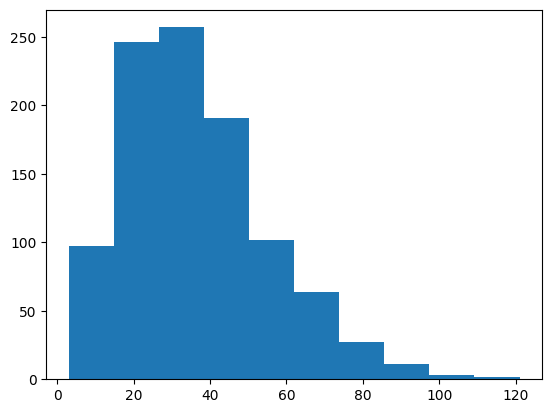

In [2]:
import matplotlib.pyplot as plt
plt.hist(data)
plt.show()

---

## Central Tendency

These three measures all aim to describe the "average" value of the data distribution. Each one is relevant under different circumstances.

### Arithmetic mean
*(quantitative data)*

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i} ,
$$
where $x$ is the set of values in the sample and $n$ is the sample size.

NB The mean can be a real (decimal) number even if the data themselves are discrete.

#### Exercise
* Write your own function to calculate the mean of a numpy array. 
* Apply it to the data provided above.

In [6]:
def my_mean(data):
    return sum(data)/len(data)

print(my_mean(data))


36.325


Of course, it will be helpful to have some pre-built statistics functions :)

* [numpy stats functions](https://numpy.org/doc/stable/reference/routines.statistics.html)
* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

 repeat the above exercise using `numpy.mean()`

In [7]:
print(data.mean())

36.325


You could mark the mean on the histogram like so:

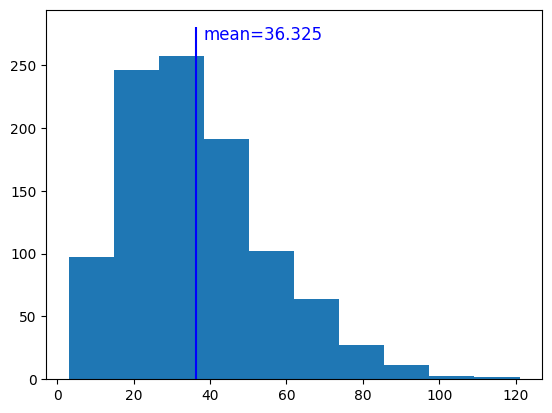

In [8]:
xbar = np.mean(data)

plt.hist(data)
plt.vlines( xbar, 0, 280, colors='blue' )
plt.text( xbar + 2, 270, 'mean=' + str(xbar), color='blue', fontsize='large')
plt.show()

### Median
*(quantitative data)*

The median is the middle observation, such that  50% of data lies below its value. We order the data and select the middle value. If the sample size *n* is even, take the midpoint of the middle two values.


#### Exercise 
Using only basic python, write a function `median()` to find the median value of a list of numbers. *Hint*: you will need to use `sorted()`

In [30]:
def my_median(data):
    data_sorted = sorted(data)
    n = len(data)
    middle = int((round(n/2)))

    if n % 2 == 0:
        return (data_sorted[middle]+data_sorted[middle-1])/2

    else:
        return data_sorted[middle]
    
print(my_median(data))
    

33.0


Try your function on the data provided above and compare to the result from `numpy.median()`

In [23]:
print(np.median(data))

33.0


Clearly mark both the median and the mean on the histogram.

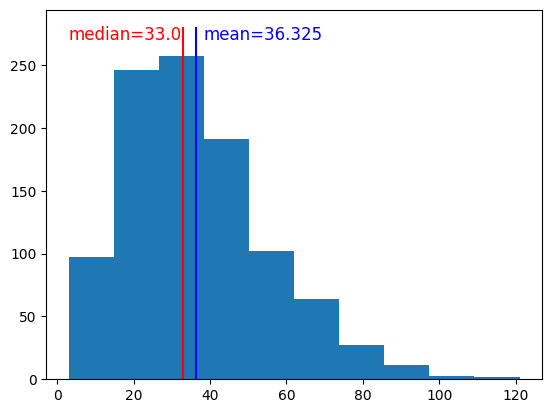

In [29]:
xbar_mean = np.mean(data)
xbar_median = np.median(data)


plt.hist(data)
plt.vlines( xbar_mean, 0, 280, colors='blue' )
plt.text( xbar_mean + 2, 270, 'mean=' + str(xbar_mean), color='blue', fontsize='large')
plt.vlines( xbar_median, 0, 280, colors='red' )
plt.text( xbar_median - 30, 270, 'median=' + str(xbar_median), color='red', fontsize='large')

plt.show()

Which of the two is a more representative value for this data set?

Median

### Mode
*(categorical OR discrete data)*

The mode is the value that occurs most frequently in the sample.

#### Exercise
Using only basic python, write a function `mode()` to find the mode of a list of values.

In [50]:
def my_mode(data):
    d = {}
    for i in data:
        if i in d:
            d[i] += 1
        else:
            d[i] = 1  

    max_count = max(d.values())
    modes = []

    for k in d:
        if d[k] == max_count:
            modes.append(k)  

    return modes

print(my_mode(data))

[np.float64(29.0)]


Try your function on the data provided and compare to the result from `scipy.stats.mode()` 

In [51]:
import scipy

print(scipy.stats.mode(data))

ModeResult(mode=np.float64(29.0), count=np.int64(32))


---

## Dispersion
Dispersion measures aim to describe the *variability* of quantitative data - i.e. the degree to which it is spread out from the "average".

### Inter-quartile range
Similarly to the median, we can calculate *percentile* values that are greater than a specified proportion of the sampled data. The median is the same as the 50th percentile. *Quantile* is another name for percentile - we simply use a decimal value instead of a percentage.

In [52]:
print(np.median(data))

33.0


In [53]:
print(np.quantile(data, 0.5))

33.0


The difference between the 75th percentile (aka the upper quartile) and the 25th percentile (aka the lower quartile) is called the *inter-quartile range* (IQR), which is a good basic measure of dispersion

In [54]:
lq = np.quantile(data,0.25)
uq = np.quantile(data,0.75)

print("lower quartile:",lq)
print("upper quartile:",uq)
print("IQR:",uq-lq)

lower quartile: 22.0
upper quartile: 47.25
IQR: 25.25


In [55]:
from scipy.stats import iqr
print(iqr(data))

25.25


The IQR is the basis for the box-and-whisker plot:
* the median is marked with a line
* the upper and lower quartiles are marked with a box
* the last data points within 1.5 $\times$ IQR away from the box are marked with whiskers.
* Any "outlier" values that are beyond the whiskers are marked with circles. 

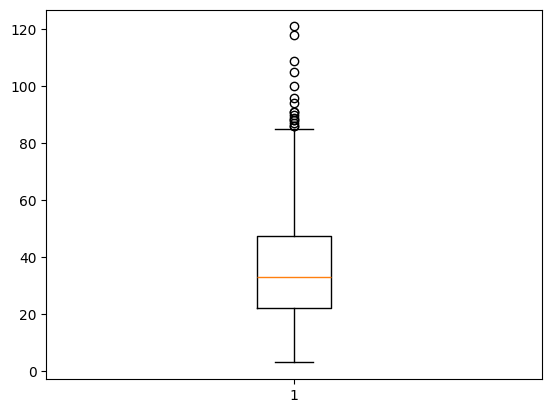

In [56]:
plt.boxplot(data)
plt.show()

The box plot can be a useful tool for summarising and comparing distributions, but bear in mind that it completely hides the *shape* of the distribution, so it can sometimes be misleading.

### Variance
$$
s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

#### Exercise
* Write your own function to calculate the variance of a list of values. 
* Check that it works on the data above.
* Compare to the result from `numpy.var()`.

In [61]:
np.var(data)

np.float64(357.273375)

The above definition of variance is used to *describe* the variance of the data sample itself. When we want to *infer* the variance of the population, we should use a slightly adjusted definition:

$$
\sigma^2 \approx \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

You can switch to this definition using `ddof=1` as shown:

In [62]:
np.var(data, ddof=1)

np.float64(357.63100600600603)

### Standard Deviation
The standard deviation, $s$, is simply the square root of the variance, $s^2$. You can use

In [58]:
np.std(data)

np.float64(18.901676512944558)

or to estimate the population standard deviation $\sigma$, use

In [59]:
np.std(data, ddof=1)

np.float64(18.91113444524167)

(this is often called the *sample standard deviation*, though this is a fairly ambiguous name!)

---

## Standard Error of the Mean

If we want to use the sample mean $\bar{x}$ as an estimate of the population mean $\mu$ then it can be helpful to know how accurate this estimate is likely to be. If we have a very large sample size $n$ (and the sampling is random!) then it is clear that we will get a better estimate than if we only had two or three data points. The **standard error** is calculated from the (estimated) population standard deviation $\sigma$ as
$$
\text{SE} = \frac{\sigma}{\sqrt{n}}
$$

In [63]:
np.std(data, ddof=1)/np.sqrt(len(data))

np.float64(0.5980225798462848)

We make use of the standard error in a concise presentation of the estimated population mean, e.g.
$$
\mu = 3.76 \pm 0.84
$$

Another important use of the standard error is for calculating error bars on bar charts, when the height of each bar is representing a mean of several observed values - e.g. when an experiment has been repeated several times.

### Exercise
Below are observations for each of three variables (a, b, c) from an experiment that was repeated three times.
Draw a bar chart to show the estimated population means for a, b and c. Include error bars.

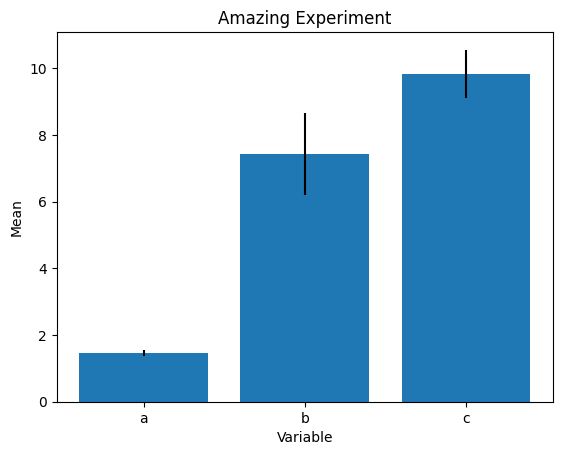

In [66]:
import matplotlib.pyplot as plt
import numpy as np

a = [1.3, 1.6, 1.5]
b = [8.3, 5.0, 9.0]
c = [10.0, 11.0, 8.5]

vars = ["a", "b", "c"]
means = [np.mean(a), np.mean(b), np.mean(c)]
se = [np.std(a, ddof=1)/(np.sqrt(len(a))), np.std(b, ddof=1)/(np.sqrt(len(b))), np.std(c, ddof=1)/(np.sqrt(len(c)))]

plt.bar(vars, means, yerr=se)
plt.xlabel("Variable")
plt.ylabel("Mean")
plt.title("Amazing Experiment")
plt.show()

---

## Pearson's Product Moment Correlation Coefficient

This is another useful summary statistic when we are looking at paired sets of values $(x,y)$ - i.e. any pair of variables that we could plot on a scatter plot

$$
r = \frac{ \sum{ x_{i} y_{i} } - n \bar{x} \bar{y} } {(n - 1) s_{x} s_{y}},
$$

where $s_{x}$ and $s_{y}$ are the standard deviations of the individual variables $x$ and $y$.

Pearson's $r$ varies from -1 (perfectly anticorrelated) to 1 (perfectly correlated). Values close to 0 show weak, possibly statistically insignificant correlations.

### Example

The file *compounds.txt* contains data for molecular compounds. Two attributes are recorded for each compound - the polar surface area (**psa**) and the predicted hydrophobicity (**alogp**). Does hydrophobicity depend on polar surface area?

In [67]:
compound_data = np.loadtxt('Data/compounds.txt')
psa = compound_data[:,0]
alogp = compound_data[:,1]

First let's draw the scatter plot:

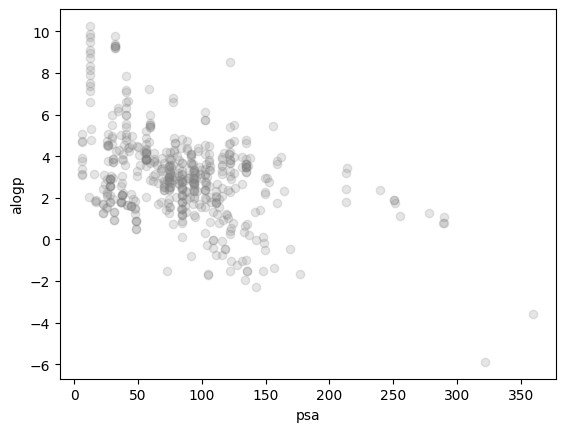

In [71]:
import matplotlib.pyplot as plt
plt.scatter(psa, alogp, c='gray', alpha=0.2)
plt.xlabel('psa')
plt.ylabel('alogp')
plt.show()

It seems that there is a negative correlation: as **psa** increases, **alogp** decreases.
Let's quantify this using Pearson's $r$:

In [72]:
from scipy.stats import pearsonr
r, pval = pearsonr(psa, alogp)
print('r=',r)

r= -0.44451995792933163


This value corresponds to moderate negative correlation, which is what we observed in the figure. The other value returned by the function (`pval`) is called a *p-value*, which is used to assess whether the statistical significance of the correlation. We will discuss p-values more in tomorrow's session!

To complete the figure, let's add a regression line and annotate with the value of $r$ that we just calculated:

In [73]:
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (m) and y-intercept (c)
# deg=1 means linear fit (i.e. polynomial of degree 1)
m, c = np.polyfit(psa, alogp, deg=1)

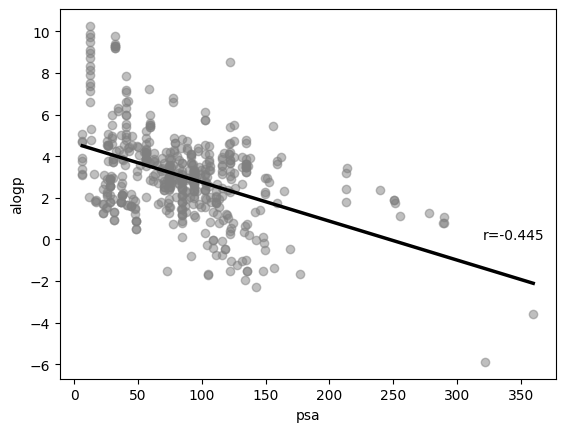

In [74]:
plt.scatter(psa, alogp, c='gray',alpha=0.5)
plt.xlabel('psa')
plt.ylabel('alogp')

# Create a sequence of 100 numbers spanning the range of psa
xseq = np.linspace(min(psa), max(psa), num=100)

# Plot regression line
plt.plot(xseq, m * xseq + c, color="k", lw=2.5)
plt.text(320, 0, 'r='+str(round(r,3)))
plt.show()

---